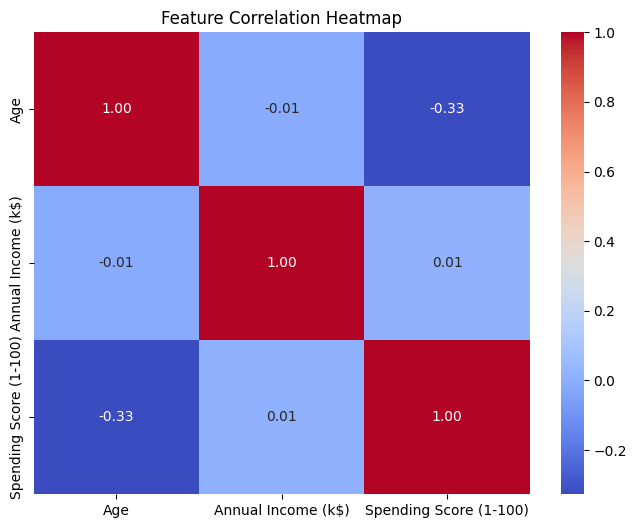

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Convert numerical columns to proper types
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Annual Income (k$)"] = pd.to_numeric(df["Annual Income (k$)"], errors="coerce")
df["Spending Score (1-100)"] = pd.to_numeric(df["Spending Score (1-100)"], errors="coerce")

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [31]:
df.head()
df["Gender"] = df["Gender"].astype(str)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])
print(df["Gender"].value_counts())  # Verify count of each category
df.head()


Gender
0    112
1     88
Name: count, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


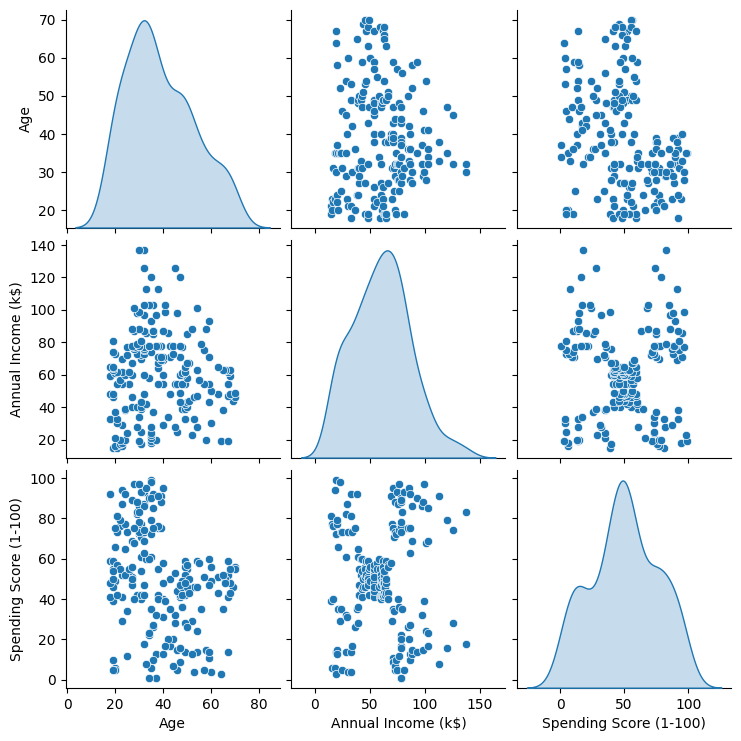

In [32]:
# Pair Plot
sns.pairplot(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]], diag_kind="kde")
plt.show()


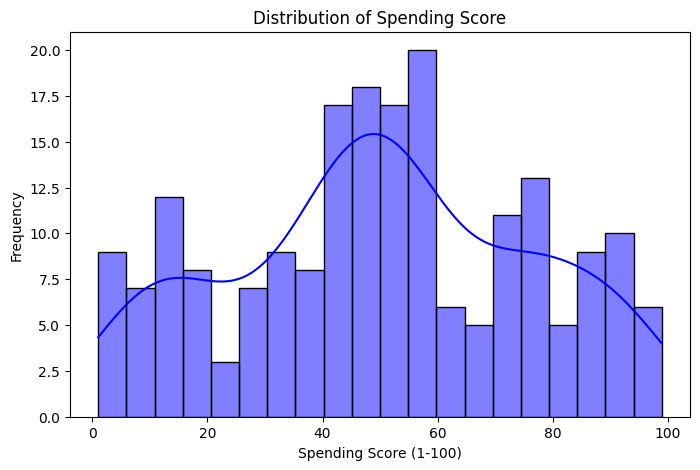

In [33]:
# Distribution of Spending Score
plt.figure(figsize=(8, 5))
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, color="blue")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Frequency")
plt.title("Distribution of Spending Score")
plt.show()

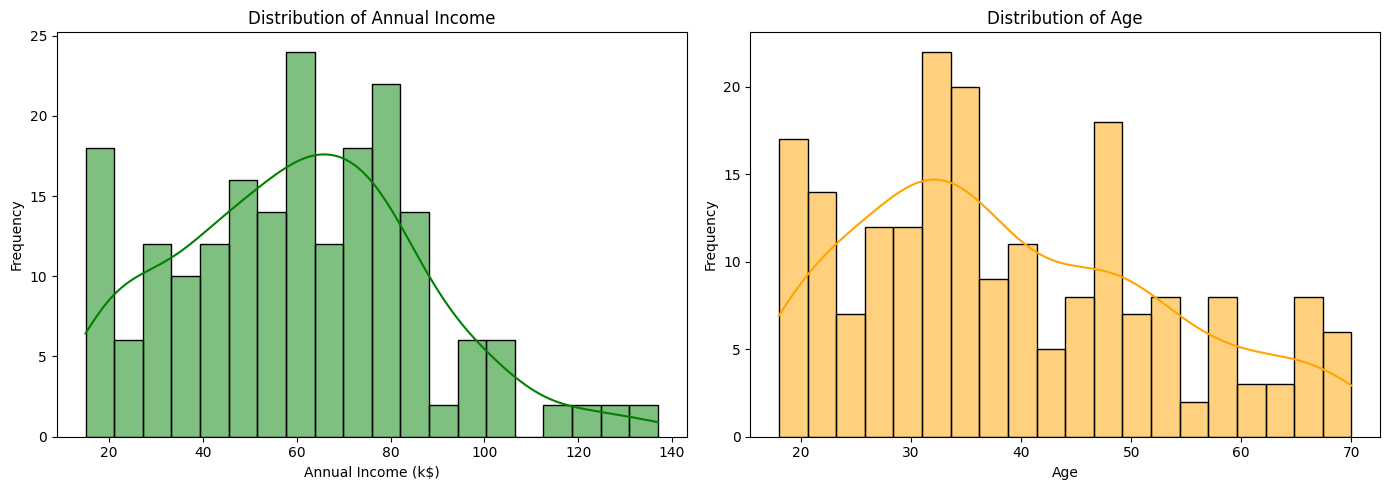

In [34]:
# Distribution of Annual Income and Age
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, color="green", ax=axes[0])
axes[0].set_xlabel("Annual Income (k$)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Annual Income")

sns.histplot(df["Age"], bins=20, kde=True, color="orange", ax=axes[1])
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Age")

plt.tight_layout()
plt.show()

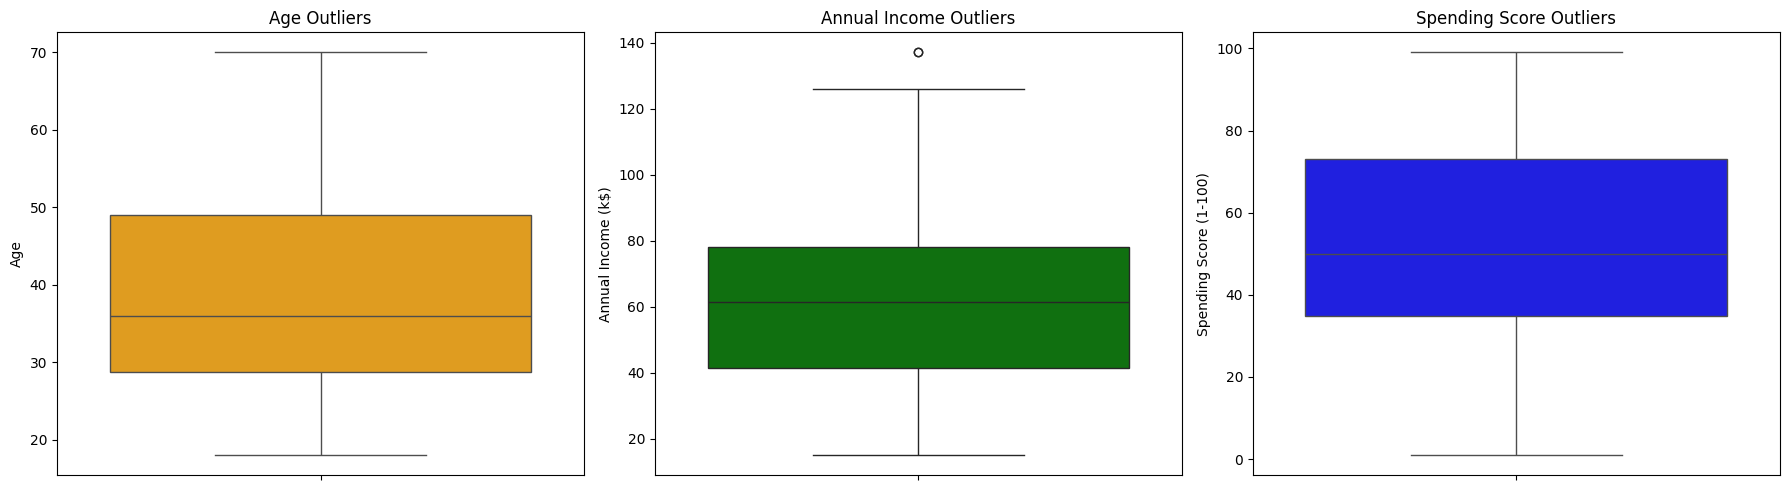

In [35]:
# Boxplots for Outlier Detection
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=df["Age"], color="orange", ax=axes[0])
axes[0].set_title("Age Outliers")

sns.boxplot(y=df["Annual Income (k$)"], color="green", ax=axes[1])
axes[1].set_title("Annual Income Outliers")

sns.boxplot(y=df["Spending Score (1-100)"], color="blue", ax=axes[2])
axes[2].set_title("Spending Score Outliers")

plt.tight_layout()
plt.show()


In [36]:
# Remove duplicates
df = df.drop_duplicates()

# Convert numerical columns to proper types
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Annual Income (k$)"] = pd.to_numeric(df["Annual Income (k$)"], errors="coerce")
df["Spending Score (1-100)"] = pd.to_numeric(df["Spending Score (1-100)"], errors="coerce")

# Handle missing values by filling with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Display first few rows after cleaning
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


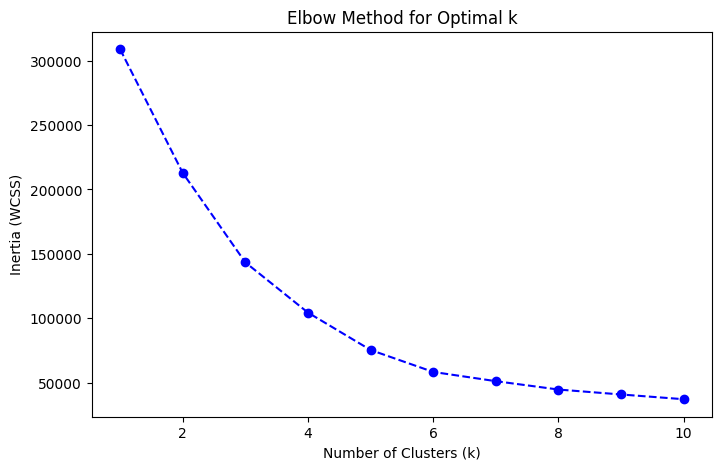

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Encode Gender
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])  # 'Male' -> 1, 'Female' -> 0

# Selecting Features for Clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# ---------------------------- ELBOW METHOD ---------------------------- #
inertia = []
K_range = range(1, 11)  # Checking for clusters from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()



In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans with the optimal number of clusters (choosing k=5 based on common benchmarks for this dataset)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display cluster assignment counts
df['Cluster'].value_counts().sort_index()


Cluster
0    20
1    54
2    40
3    39
4    47
Name: count, dtype: int64

In [40]:
df['Gender-Cluster'] = df['Cluster'].astype(str) + '-' + df['Gender'].astype(str)
df[["Age","Annual Income (k$)", "Spending Score (1-100)", "Gender-Cluster"]].to_csv("clustered_customers.csv", index=False)

In [48]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("clustered_customers.csv")

# Split the "Gender-Cluster" column into two separate columns
df[["Cluster", "Gender"]] = df["Gender-Cluster"].str.split("-", expand=True)

# Convert them to integers
df["Gender"] = df["Gender"].astype(int)
df["Cluster"] = df["Cluster"].astype(int)

# Drop the old "Gender-Cluster" column
df.drop(columns=["Gender-Cluster"], inplace=True)

# Save the cleaned data (optional)
df.to_csv("cleaned_clustered_customers.csv", index=False)

# Print the cleaned data
print(df.head())


   Age  Annual Income (k$)  Spending Score (1-100)  Cluster  Gender
0   19                  15                      39        1       1
1   21                  15                      81        1       1
2   20                  16                       6        0       0
3   23                  16                      77        1       0
4   31                  17                      40        1       0


In [49]:
df

,Age,Annual Income (k$),Spending Score (1-100),Cluster,Gender
0,19,15,39,1,1
1,21,15,81,1,1
2,20,16,6,0,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,2,0
196,45,126,28,3,0
197,32,126,74,2,1
198,32,137,18,3,1


In [50]:
df[['Gender','Cluster']].value_counts().sort_index()

Gender  Cluster
0       0          12
        1          32
        2          22
        3          19
        4          27
1       0           8
        1          22
        2          18
        3          20
        4          20
Name: count, dtype: int64

C:\Users\shash\AppData\Local\Temp\ipykernel_13492\3731741716.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Gender"], y=df["Annual Income (k$)"], palette="coolwarm")


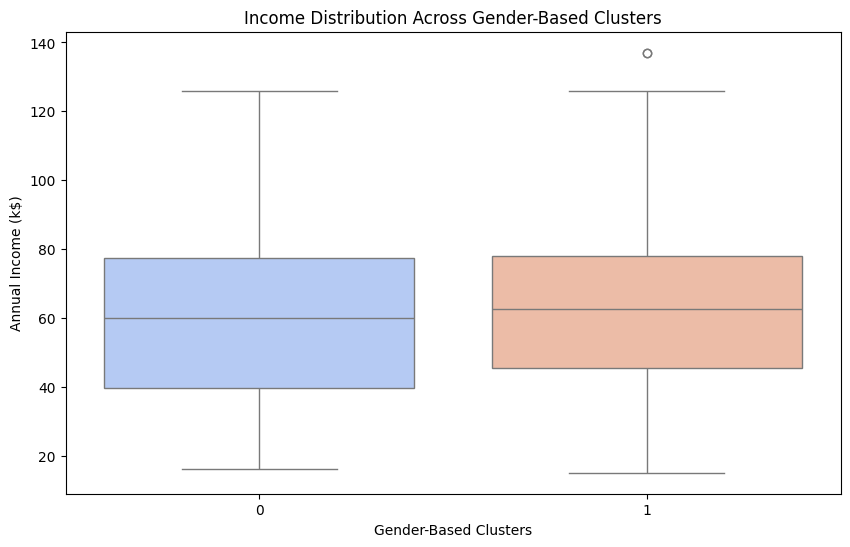

In [52]:
# ---------------------------- VISUALIZATION ---------------------------- #
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Gender"], y=df["Annual Income (k$)"], palette="coolwarm")
plt.title("Income Distribution Across Gender-Based Clusters")
plt.xlabel("Gender-Based Clusters")
plt.ylabel("Annual Income (k$)")
plt.show()


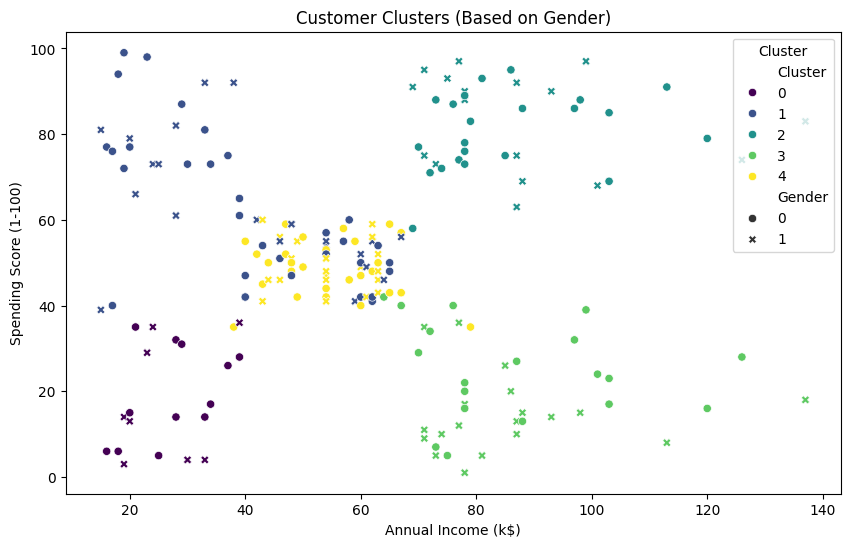

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Income vs. Spending Score, Colored by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], 
                hue=df["Cluster"], style=df["Gender"], palette="viridis")

plt.title("Customer Clusters (Based on Gender)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()


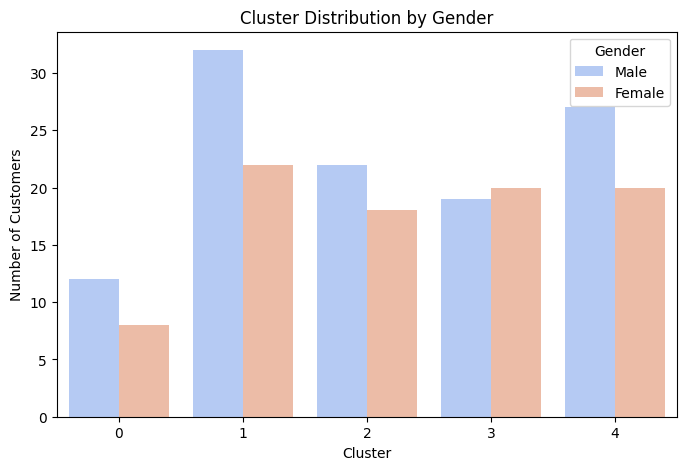

In [59]:
# Count Plot: Cluster distribution based on Gender
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Cluster"], hue=df["Gender"], palette="coolwarm")

plt.title("Cluster Distribution by Gender")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.legend(["Male", "Female"], title="Gender")
plt.show()


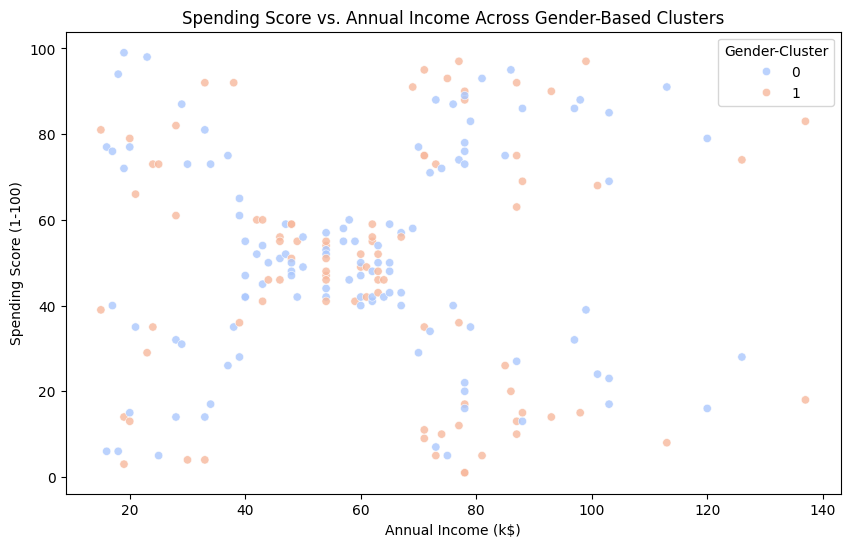

In [54]:
# Scatter plot of Spending Score vs Annual Income, colored by cluster
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Gender'], palette="coolwarm", alpha=0.8)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Spending Score vs. Annual Income Across Gender-Based Clusters")
plt.legend(title="Gender-Cluster", bbox_to_anchor=(1,1))
plt.show()


In [55]:
import joblib

# Save the trained KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, open("scaler.pkl", "wb"))

print("Model saved successfully!")


Model saved successfully!


In [56]:
# Load the trained KMeans model
kmeans_loaded = joblib.load('kmeans_model.pkl')

print("Model loaded successfully!")


Model loaded successfully!


In [57]:
import numpy as np

# Example new data point (Age, Annual Income, Spending Score)
new_customer = np.array([[30, 70, 50]])  # Modify this as needed

# Predict the cluster
predicted_cluster = kmeans_loaded.predict(new_customer)

print(f"New customer belongs to Cluster: {predicted_cluster[0]}")


New customer belongs to Cluster: 2


In [19]:
import pandas as pd
import joblib

# Load the saved KMeans model
kmeans_loaded = joblib.load("kmeans_model.pkl")

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Manually encode gender
gender_mapping = {'Male': 1, 'Female': 0}  # Ensuring Male = 1 and Female = 0
df['Gender'] = df['Gender'].map(gender_mapping)

print(f"Gender Encoding: {gender_mapping}")


Gender Encoding: {'Male': 1, 'Female': 0}


In [20]:
import numpy as np

# Example new customer details (Age, Annual Income, Spending Score, Gender)
new_customer = np.array([[30, 70, 50, 1]])  # Gender: Male (encoded as 1)

# Extract only the relevant features (excluding Gender for K-Means prediction)
new_customer_features = new_customer[:, :-1]

# Predict the cluster
predicted_cluster = kmeans_loaded.predict(new_customer_features)[0]

# Assign gender-based cluster
gender_encoded = new_customer[0, -1]  # Extract gender (0=Male, 1=Female)
gender_based_cluster = f"{predicted_cluster}-{gender_encoded}"

print(f"New customer belongs to Gender-Based Cluster: {gender_based_cluster}")


New customer belongs to Gender-Based Cluster: 2-1


In [21]:
new_customers = np.array([
    [25, 50, 60, 0],  # Female
    [40, 80, 20, 1],  # Male
    [67, 98, 56, 0]   # Female
])

# Extract features (Age, Annual Income, Spending Score)
new_customers_features = new_customers[:, :-1]

# Predict clusters
predicted_clusters = kmeans_loaded.predict(new_customers_features)

# Assign gender-based clusters
gender_encoded = new_customers[:, -1]
gender_based_clusters = [f"{c}-{g}" for c, g in zip(predicted_clusters, gender_encoded)]

print(f"Predicted Gender-Based Clusters: {gender_based_clusters}")


Predicted Gender-Based Clusters: ['2-0', '2-1', '2-0']
